In [1]:
import numpy as np
import pandas as pd

from util.directed_graph import DirectedGraph
from util.read_pairs_data import read_pairs_data
from util.graph_vis import GraphVisualization
from greedy_n_way_exchange import GreedyNWayExchange

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pairs_filename = "../data/100/100_18_pairs.txt"

In [3]:
pairs = read_pairs_data(pairs_filename)
pairs.head()

,pair_num,donor_bloodtype,recipient_bloodtype,pra
0,P1800,B,O,5
1,P1801,O,O,28
2,P1802,B,A,5
3,P1803,B,A,5
4,P1804,A,O,5


In [4]:
pairs.tail()

,pair_num,donor_bloodtype,recipient_bloodtype,pra
94,P1894,A,O,32
95,P1895,A,B,32
96,P1896,A,O,90
97,P1897,A,O,90
98,P1898,A,O,10


In [16]:
grph = DirectedGraph(pairs.head(20))

In [17]:
grph.adjacency

{'P1800': ['P1806', 'P1808', 'P1813', 'P1814', 'P1818'],
 'P1801': ['P1800',
  'P1802',
  'P1803',
  'P1804',
  'P1805',
  'P1806',
  'P1807',
  'P1808',
  'P1809',
  'P1810',
  'P1811',
  'P1812',
  'P1813',
  'P1814',
  'P1815',
  'P1816',
  'P1817',
  'P1818',
  'P1819'],
 'P1802': ['P1806', 'P1808', 'P1813', 'P1814', 'P1818'],
 'P1803': ['P1806', 'P1808', 'P1813', 'P1814', 'P1818'],
 'P1804': ['P1802', 'P1803', 'P1805'],
 'P1805': ['P1800',
  'P1801',
  'P1802',
  'P1803',
  'P1804',
  'P1806',
  'P1807',
  'P1808',
  'P1809',
  'P1810',
  'P1811',
  'P1812',
  'P1813',
  'P1814',
  'P1815',
  'P1816',
  'P1817',
  'P1818',
  'P1819'],
 'P1806': ['P1802', 'P1803', 'P1805'],
 'P1807': ['P1806', 'P1808', 'P1813', 'P1814', 'P1818'],
 'P1808': ['P1802', 'P1803', 'P1805'],
 'P1809': ['P1802', 'P1803', 'P1805'],
 'P1810': ['P1802', 'P1803', 'P1805'],
 'P1811': ['P1800',
  'P1801',
  'P1802',
  'P1803',
  'P1804',
  'P1805',
  'P1806',
  'P1807',
  'P1808',
  'P1809',
  'P1810',
  'P1812'

In [29]:
gv = GraphVisualization()

for from_, to_ in grph.get_edges():
    gv.add_edge(from_, to_)

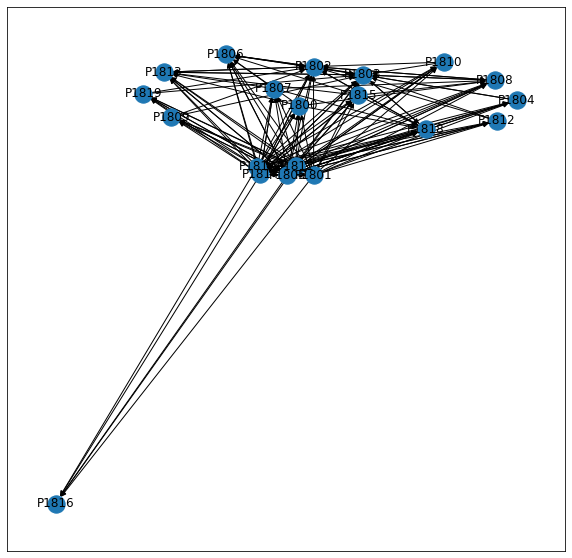

In [30]:
plt.figure(figsize=(10, 10))
gv.visualize()

In [20]:
cycles = grph.get_cycles()

In [21]:
cycles

[['P1800', 'P1806', 'P1802', 'P1808', 'P1803', 'P1813', 'P1805'],
 ['P1800', 'P1806', 'P1802', 'P1808', 'P1803', 'P1813', 'P1805', 'P1801'],
 ['P1800',
  'P1806',
  'P1802',
  'P1808',
  'P1803',
  'P1813',
  'P1805',
  'P1801',
  'P1807',
  'P1814'],
 ['P1800',
  'P1806',
  'P1802',
  'P1808',
  'P1803',
  'P1813',
  'P1805',
  'P1801',
  'P1807',
  'P1814',
  'P1811'],
 ['P1800',
  'P1806',
  'P1802',
  'P1808',
  'P1803',
  'P1813',
  'P1805',
  'P1801',
  'P1807',
  'P1814',
  'P1811',
  'P1817'],
 ['P1800',
  'P1806',
  'P1802',
  'P1808',
  'P1803',
  'P1813',
  'P1805',
  'P1801',
  'P1807',
  'P1814',
  'P1817'],
 ['P1800',
  'P1806',
  'P1802',
  'P1808',
  'P1803',
  'P1813',
  'P1805',
  'P1801',
  'P1807',
  'P1814',
  'P1817',
  'P1811'],
 ['P1800',
  'P1806',
  'P1802',
  'P1808',
  'P1803',
  'P1813',
  'P1805',
  'P1801',
  'P1811'],
 ['P1800',
  'P1806',
  'P1802',
  'P1808',
  'P1803',
  'P1813',
  'P1805',
  'P1801',
  'P1811',
  'P1807',
  'P1814'],
 ['P1800',
  'P1

In [22]:
gnway = GreedyNWayExchange(10, 'maximum')

In [23]:
gnway.finalize_exchange(grph)

In [24]:
gnway.show_donation_mapping('text')

P1800 --> P1806 --> P1802 --> P1808 --> P1803 --> P1813 --> P1805
P1801 --> P1807 --> P1814
P1811 --> P1817


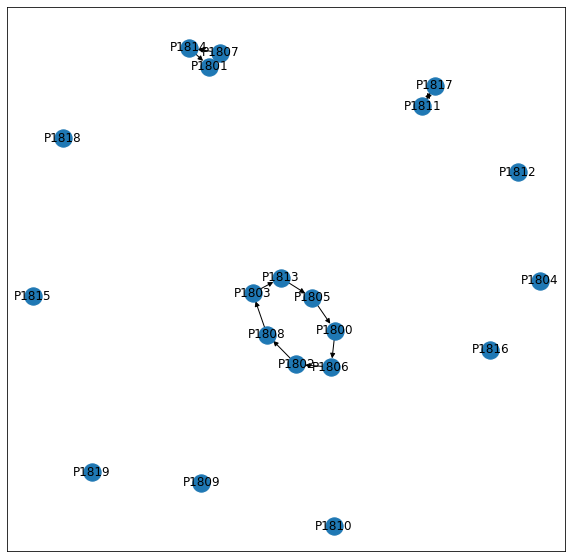

In [25]:
plt.figure(figsize=(10, 10))
gnway.show_donation_mapping('graph')

In [26]:
gnway.get_num_of_matched_pairs()    

12